<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/Correlation_Time_series_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucar - Sales Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [ ]:
pd.read_csv("/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/alucar.csv").head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv("/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/alucar.csv")

Queremos descobrir periodos em que a empresa está vendendo mais ou menos


In [ ]:
# Analise dos dados
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
# Dados nulos
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [ ]:
# Tipos de dados que estamos trabalhando
alucar.dtypes

,0
mes,object
vendas,int64


In [ ]:
# Convertendo para datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

,0
mes,datetime64[ns]
vendas,int64


<Axes: xlabel='mes', ylabel='vendas'>

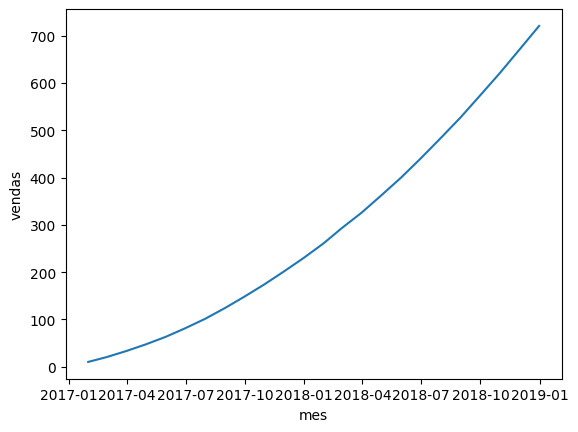

In [ ]:
sns .lineplot(x ='mes', y = 'vendas', data = alucar)

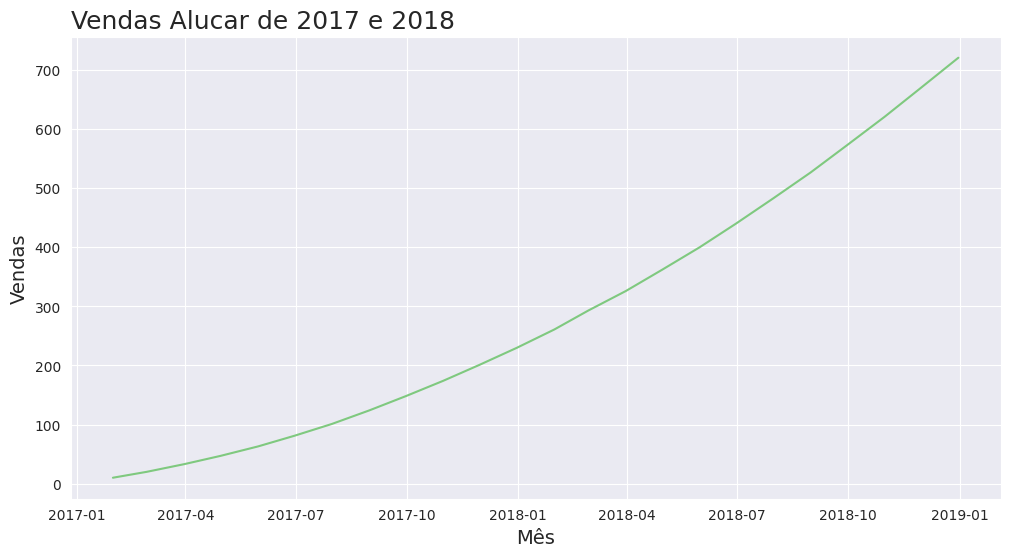

In [ ]:
# Melhorando o gŕafico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x ='mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Mês',fontsize = 14)
ax.set_ylabel('Vendas',fontsize = 14)
plt.show()

In [ ]:
# implementando crecimento proporcional
alucar['crescimento'] = alucar.vendas.pct_change()
alucar.head()

,mes,vendas,crescimento
0,2017-01-31,10,NaN
1,2017-02-28,20,1.000000
2,2017-03-31,33,0.650000
3,2017-04-30,47,0.424242
4,2017-05-31,63,0.340426


In [ ]:
# aumento
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()


,mes,vendas,crescimento,aumento
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,1.000000,10.0
2,2017-03-31,33,0.650000,13.0
3,2017-04-30,47,0.424242,14.0
4,2017-05-31,63,0.340426,16.0


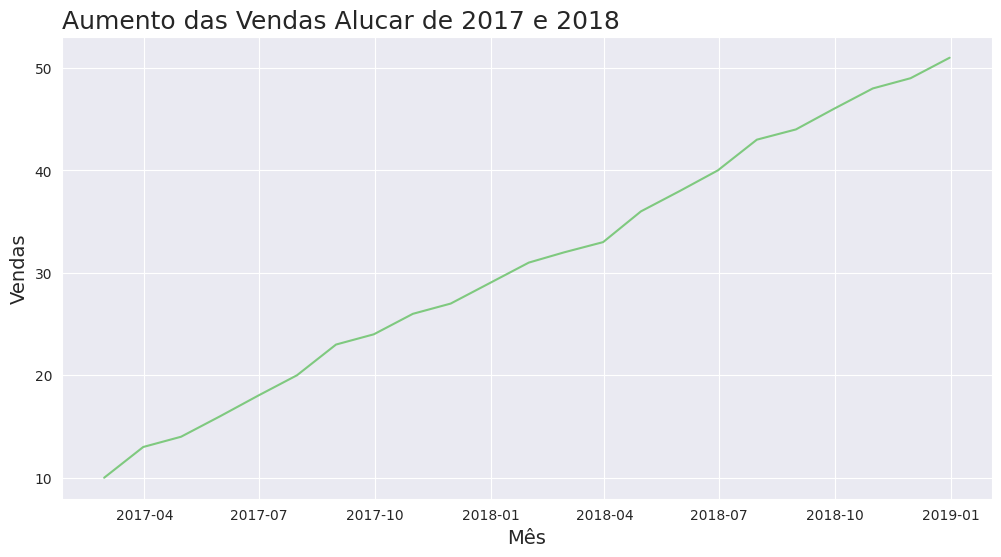

In [ ]:
# Aumento das vendas
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x ='mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Mês',fontsize = 14)
ax.set_ylabel('Vendas',fontsize = 14)
plt.show()

In [ ]:
# Criando uma função para o grafico comum
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x =x, y = y, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel('Mês',fontsize = 14)
  ax.set_ylabel('Vendas',fontsize = 14)
  plt.show()

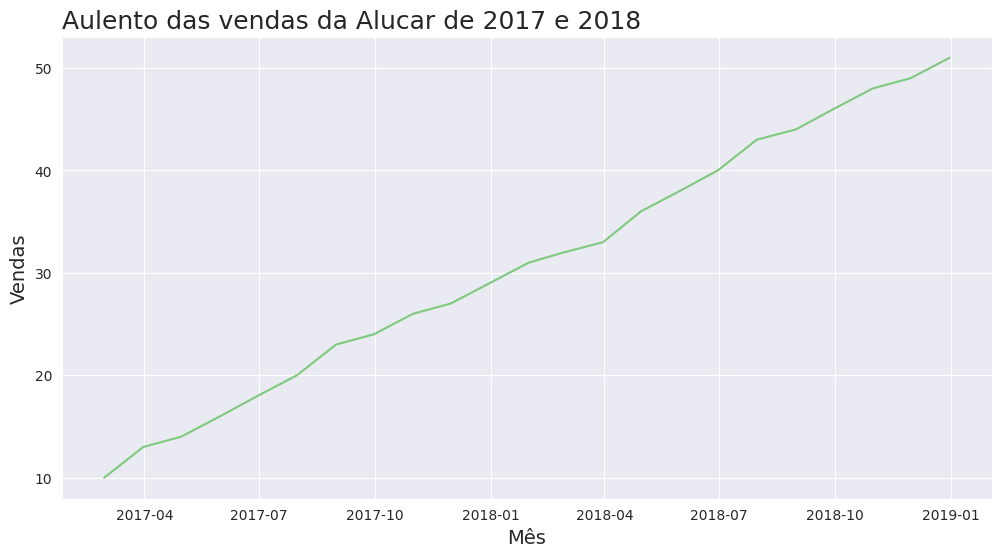

In [ ]:
plotar('Aulento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [ ]:
# Aceleração
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,crescimento,aumento,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,1.000000,10.0,NaN
2,2017-03-31,33,0.650000,13.0,3.0
3,2017-04-30,47,0.424242,14.0,1.0
4,2017-05-31,63,0.340426,16.0,2.0


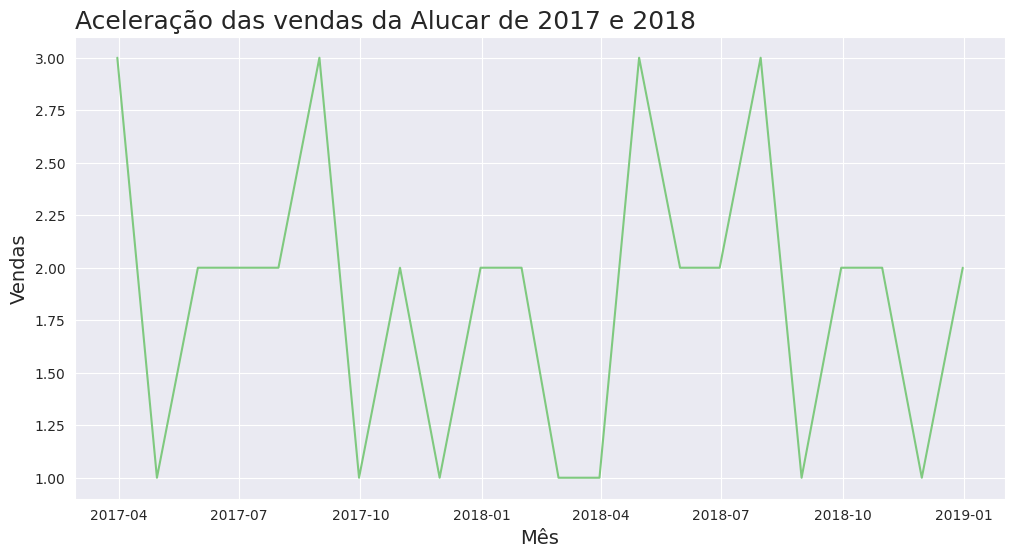

In [ ]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aceleracao', alucar)

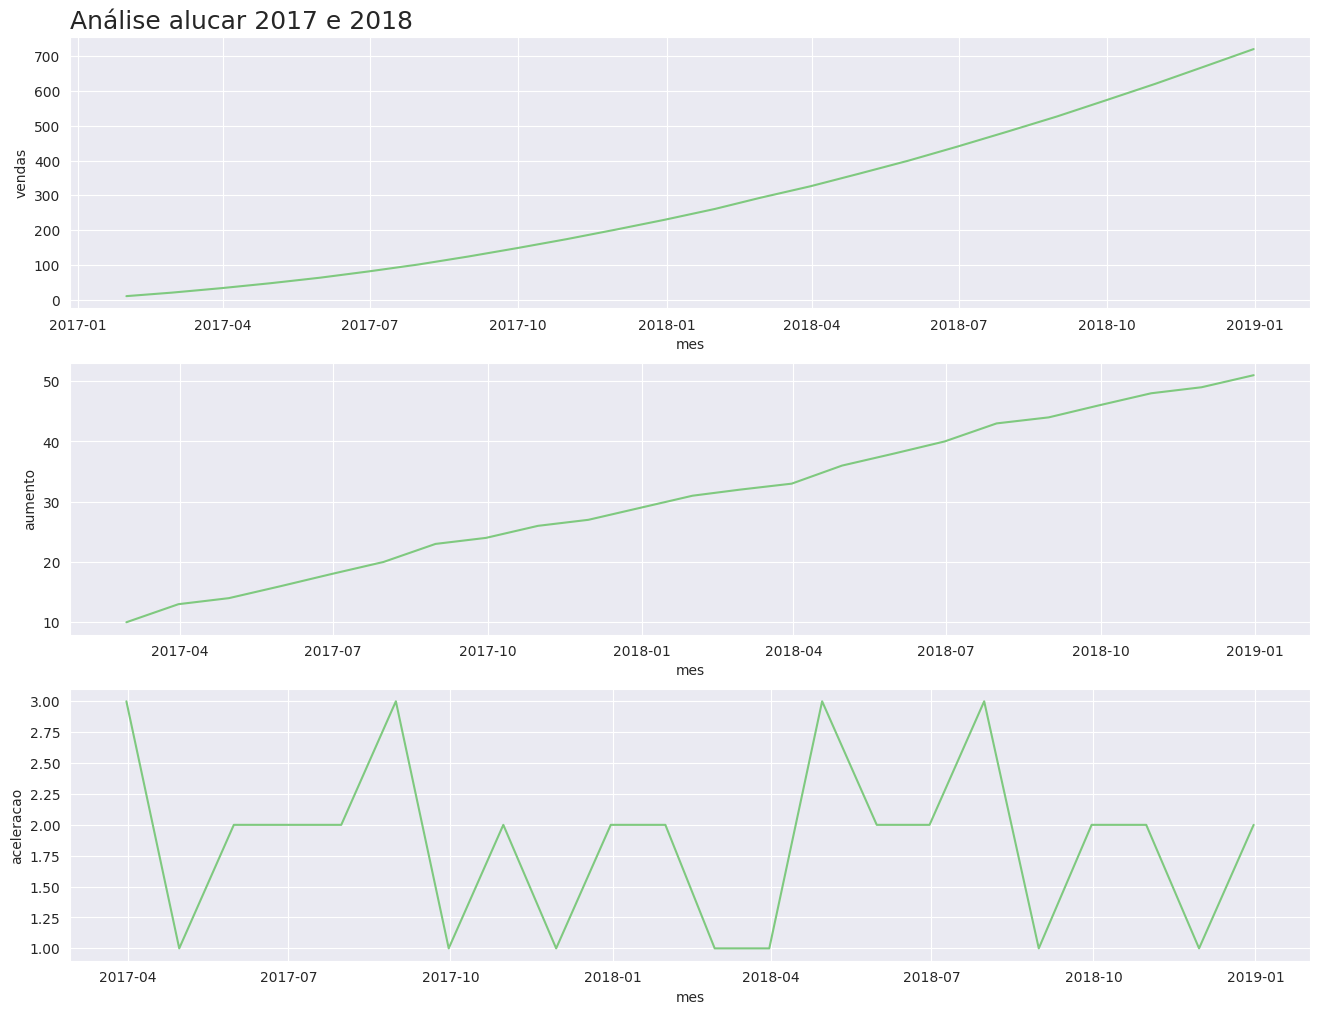

In [ ]:
# Exibindo os 3 gráficos

plt.figure(figsize = (16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da alucar 2017 e 2018 ', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)

plt.show()


In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  plt.show()

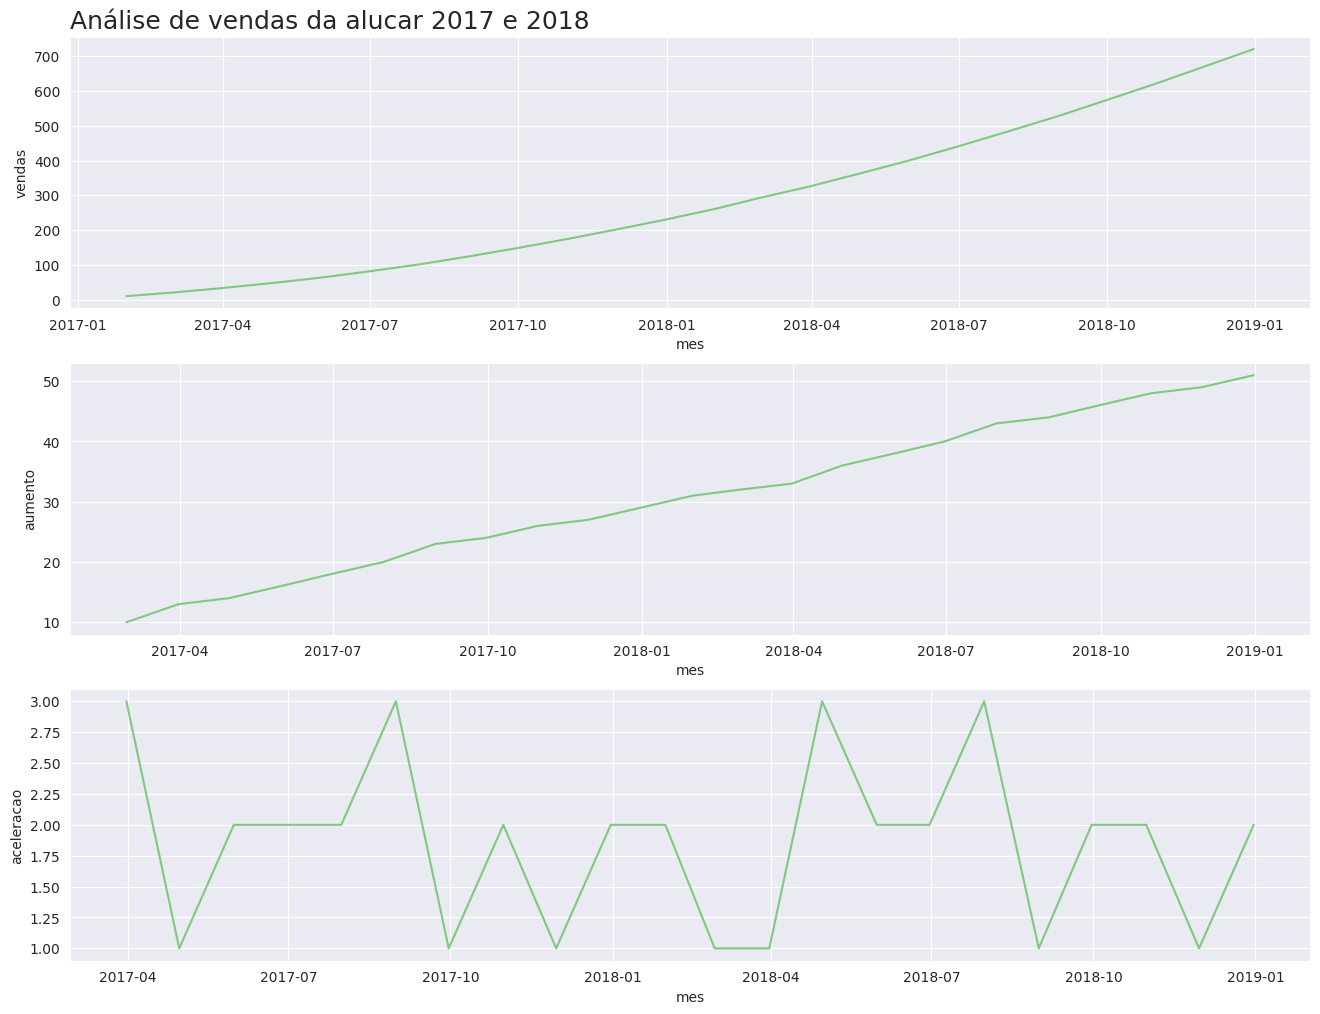

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da alucar 2017 e 2018')

Usando a função de autocorrelação


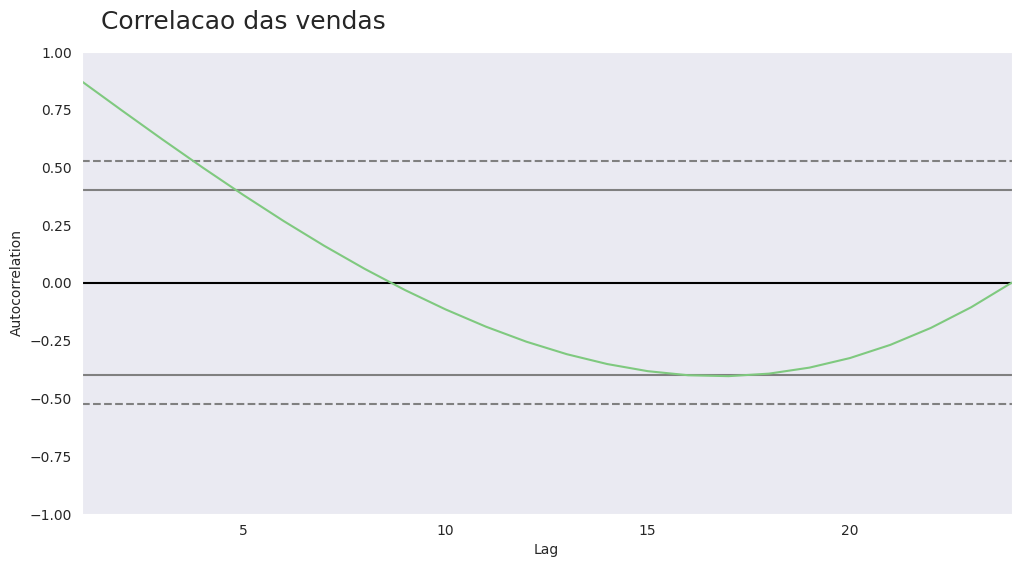

In [ ]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlacao das vendas', fontsize = 18 , x =0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax
# Podemos inferir que os 7 primeiros dias, ou seja os dados de uma semana tem correlação com os da semana passada

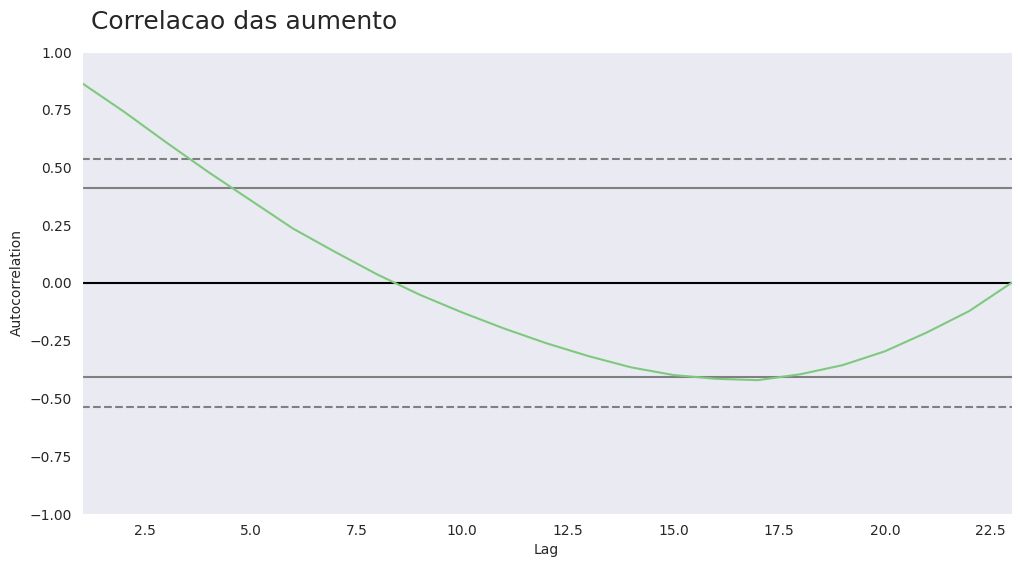

In [ ]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlacao das aumento', fontsize = 18 , x =0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:]) # ficar atendo para onde começão os valores
ax = ax

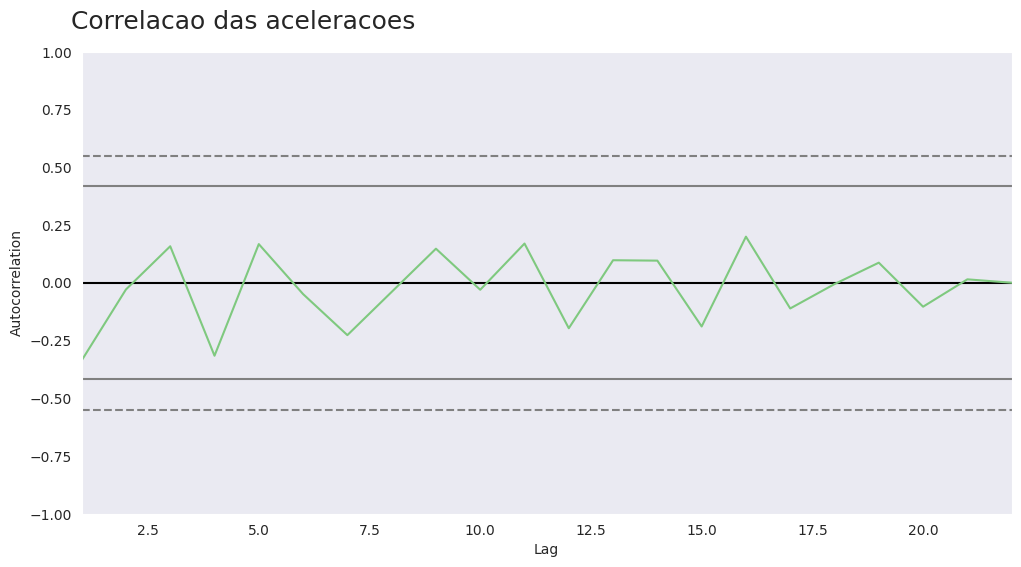

In [ ]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlacao das aceleracoes', fontsize = 18 , x =0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax